In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Grovers Search algorithm
[Grovers search](https://qiskit.org/documentation/stubs/qiskit.aqua.algorithms.Grover.html?highlight=grovers%20algorithm) is a oracular quantum algorithm which is used as a way to solve unstructured search problems. In the following we provide a wrapper to the quantum algorithm that takes as its input a [LogicalExpressionOracle](https://qiskit.org/documentation/stubs/qiskit.aqua.components.oracles.LogicalExpressionOracle.html#qiskit.aqua.components.oracles.LogicalExpressionOracle), a quantum device, and the number of shots to perform. 

The logical expression is currently setup as a LogicalExpressionOracle object, but can be extended to include [TruthTableOracle](https://qiskit.org/documentation/stubs/qiskit.aqua.components.oracles.TruthTableOracle.html#qiskit.aqua.components.oracles.TruthTableOracle) or other oracles as input to describe the expression. 

The function returns a returns job instance derived from [BaseJob](https://qiskit.org/documentation/stubs/qiskit.providers.BaseJob.html#qiskit.providers.BaseJob) that is created by the [execution](https://qiskit.org/documentation/apidoc/execute.html?highlight=execute#module-qiskit.execute) function of the [QuantumInstance](https://qiskit.org/documentation/stubs/qiskit.aqua.QuantumInstance.html?highlight=quantuminstance#qiskit.aqua.QuantumInstance). 

In [2]:
# Import Grover’s algorithm and components classes
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle
from qiskit import BasicAer

# Import the QuantumInstance module that will allow us to run the algorithm on a simulator and a quantum computer
from qiskit.aqua import QuantumInstance

In [3]:
# Grover's dictionary is used to wrap all the necessary parameters in one dictionary. 
# The following is the dictionary we will use for Grover's Search.
"""
grovers_dict = {
  "expression": 'boolean_expression',
  "quantum_instance": Backend,
  "shots": 1024
}
"""

# Define our Grover's search function. This is the function that will be called by the quantum-aggregator class.
def grovers_search(dictionary):
    oracle = LogicalExpressionOracle(dictionary["expression"])
    quantum_instance = QuantumInstance(dictionary["quantum_instance"], shots=dictionary["shots"])
    grover = Grover(oracle)
    result = grover.run(quantum_instance)
    return result

### Example
Here is just a simple example that runs the `grovers_search` function.

In [4]:
# Set your logical expression, example of a logical constraint:
expression = '((A ^ B) & (C & D) & ~(A & C))'

# Set the backend device:
backend_device = BasicAer.get_backend('qasm_simulator')

In [5]:
# Define the parameters to be used by the Grover's Search algorithm:
grovers_dict = {
  "expression": expression,
  "quantum_instance": backend_device,
  "shots": 1024
}

In [6]:
# Run the algorithm and obtain results
res = grovers_search(grovers_dict)

### View results 
Extract results from the `grovers_search` example above.

In [7]:
# Print the top measured result
print('Top result:', res['top_measurement'])

Top result: 1110


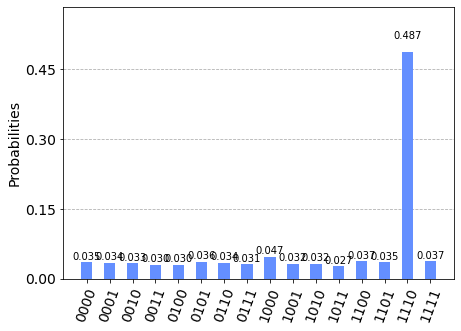

In [8]:
# Plot all measured results
plot_histogram(res['measurement'])

## Extract version tables
Two forms of extracting version information. 

1) is a full extraction which includes system information such as version of Python

2) only extracts the version of Qiskit. 

In [9]:
import qiskit.tools.jupyter
%qiskit_version_table

In [10]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.6',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.12.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.24.0'}